<a href="https://colab.research.google.com/github/luisoliverph-web/Examen/blob/main/EXAMENAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 1:

Carga el dataset MNIST desde tensorflow.keras.datasets.

• Muestra las dimensiones de los conjuntos de entrenamiento y prueba.

• Visualiza 10 imágenes con sus etiquetas reales.

Puedes descargarlo desde el sitio oficial de Yann LeCun: http://yann.lecun.com/exdb/mnist/

Allí encontrarás archivos como:

• train-images-idx3-ubyte.gz

• train-labels-idx1-ubyte.gz

• t10k-images-idx3-ubyte.gz

• t10k-labels-idx1-ubyte.gz

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


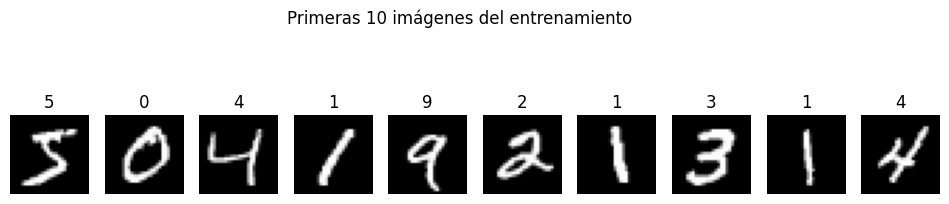

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Cargar datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Dimensiones
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# Visualizar imágenes
plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(str(y_train[i]))
plt.suptitle("Primeras 10 imágenes del entrenamiento")
plt.show()


Ejercicio 2:

Normaliza los valores de los píxeles (0–255 → 0–1).

Convierte las etiquetas en formato one-hot encoding utilizando to_categorical

Objetivo: Aplicar técnicas básicas de preprocesamiento para redes neuronales

In [3]:
from tensorflow.keras.utils import to_categorical

# Normalizar
x_train_norm = x_train.astype('float32') / 255.0
x_test_norm  = x_test.astype('float32') / 255.0

x_train_flat = x_train_norm.reshape(-1, 28*28)
x_test_flat  = x_test_norm.reshape(-1, 28*28)

# One-hot encoding
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh  = to_categorical(y_test,  num_classes=10)

print("Ejemplo one-hot (primeras 3):\n", y_train_oh[:3])


Ejemplo one-hot (primeras 3):
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Ejercicio 3:

Entrena un clasificador SVM (Support Vector Machine) con un subconjunto de
10,000 imágenes.

Evalúa su exactitud en el conjunto de prueba.

Objetivo: Contrastar un modelo clásico de ML frente a redes neuronales.

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Selección de 10,000 ejemplos
n_samples = 10000
X_svm_train = x_train_flat[:n_samples]
y_svm_train = y_train[:n_samples]

X_svm_test = x_test_flat
y_svm_test = y_test

svm = SVC(kernel='rbf', gamma='scale')

t0 = time.time()
svm.fit(X_svm_train, y_svm_train)
t1 = time.time()
print(f"Tiempo entrenamiento SVM: {t1-t0:.1f}s")

y_pred = svm.predict(X_svm_test)
acc = accuracy_score(y_svm_test, y_pred)
print("Exactitud SVM en test:", acc)



Tiempo entrenamiento SVM: 16.5s
Exactitud SVM en test: 0.9594


Ejercicio4:

Construye una Red Neuronal Multicapa (MLP) con:

• Capa de entrada de 784 neuronas (28x28)

• 2 capas ocultas (128 y 64 neuronas, activación ReLU)

• Capa de salida (10 neuronas, activación softmax)

Entrena durante 10 épocas y evalúa la precisión.

Objetivo: Implementar una red totalmente conectada

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Construir el modelo MLP
model_mlp = Sequential([
    Dense(784, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model_mlp.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Entrenar el modelo
history_mlp = model_mlp.fit(x_train_flat, y_train_oh, epochs=10, validation_split=0.2)

# Evaluar el modelo
loss_mlp, accuracy_mlp = model_mlp.evaluate(x_test_flat, y_test_oh)
print(f"Pérdida en test (MLP): {loss_mlp:.4f}")
print(f"Exactitud en test (MLP): {accuracy_mlp:.4f}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6555 - loss: 1.0464 - val_accuracy: 0.8892 - val_loss: 0.3618
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8936 - loss: 0.3569 - val_accuracy: 0.9252 - val_loss: 0.2468
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9277 - loss: 0.2413 - val_accuracy: 0.9510 - val_loss: 0.1739
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9446 - loss: 0.1795 - val_accuracy: 0.9576 - val_loss: 0.1456
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9565 - loss: 0.1415 - val_accuracy: 0.9620 - val_loss: 0.1262
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9659 - loss: 0.1093 - val_accuracy: 0.9637 - val_loss: 0.1207
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9725 - loss: 0.0906 - val_accuracy: 0.9706 - val_loss: 0.1027
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9758 -

Ejercicio5:

Modifica el número de neuronas y el optimizador (por ejemplo: adam, sgd,
rmsprop).

Evalúa cómo cambia la exactitud en validación.

Objetivo: Entender el impacto de los hiperparámetros en el rendimiento.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Construir el modelo MLP con diferentes neuronas
model_mlp_tuned = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo con SGD optimizer
model_mlp_tuned.compile(optimizer=SGD(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Entrenar el modelo
history_mlp_tuned = model_mlp_tuned.fit(x_train_flat, y_train_oh, epochs=10, validation_split=0.2)

# Evaluar el modelo
loss_mlp_tuned, accuracy_mlp_tuned = model_mlp_tuned.evaluate(x_test_flat, y_test_oh)
print(f"Pérdida en test (MLP Tuned): {loss_mlp_tuned:.4f}")
print(f"Exactitud en test (MLP Tuned): {accuracy_mlp_tuned:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1226 - loss: 2.2996 - val_accuracy: 0.1060 - val_loss: 2.2993
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1159 - loss: 2.2983 - val_accuracy: 0.1060 - val_loss: 2.2992
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1125 - loss: 2.2980 - val_accuracy: 0.1060 - val_loss: 2.2982
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1135 - loss: 2.2974 - val_accuracy: 0.1060 - val_loss: 2.2976
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1146 - loss: 2.2970 - val_accuracy: 0.1060 - val_loss: 2.2971
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.1119 - loss: 2.2962 - val_accuracy: 0.1060 - val_loss: 2.2964
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.1154 - loss: 2.2946 - val_accuracy: 0.1060 - val_loss: 2.2954
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.1124 - loss: 2.2944 - 

Ejercicio6:

Implementa una CNN con la siguiente arquitectura:

• Conv2D(32, kernel=3x3) + ReLU + MaxPooling(2x2)

• Conv2D(64, kernel=3x3) + ReLU + MaxPooling(2x2)

• Flatten + Dense(128, ReLU)

• Output(10, softmax)

Entrena y reporta precisión, pérdida y matriz de confusión.

Objetivo: Implementar una CNN básica para reconocimiento de imágenes.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 - 50s - 119ms/step - accuracy: 0.6926 - loss: 0.9670 - val_accuracy: 0.9050 - val_loss: 0.3161
Epoch 2/10
422/422 - 45s - 107ms/step - accuracy: 0.9050 - loss: 0.3160 - val_accuracy: 0.9443 - val_loss: 0.1986
Epoch 3/10
422/422 - 78s - 184ms/step - accuracy: 0.9360 - loss: 0.2110 - val_accuracy: 0.9672 - val_loss: 0.1381
Epoch 4/10
422/422 - 42s - 99ms/step - accuracy: 0.9540 - loss: 0.1523 - val_accuracy: 0.9723 - val_loss: 0.1051
Epoch 5/10
422/422 - 41s - 98ms/step - accuracy: 0.9634 - loss: 0.1198 - val_accuracy: 0.9738 - val_loss: 0.0955
Epoch 6/10
422/422 - 40s - 96ms/step - accuracy: 0.9688 - loss: 0.1009 - val_accuracy: 0.9755 - val_loss: 0.0843
Epoch 7/10
422/422 - 40s - 96ms/step - accuracy: 0.9729 - loss: 0.0878 - val_accuracy: 0.9772 - val_loss: 0.0775
Epoch 8/10
422/422 - 41s - 98ms/step - accuracy: 0.9756 - loss: 0.0785 - val_accuracy: 0.9812 - val_loss: 0.0685
Epoch 9/10
422/422 - 40s - 96ms/step - accuracy: 0.9781 - loss: 0.0706 - val_accuracy: 0.9813

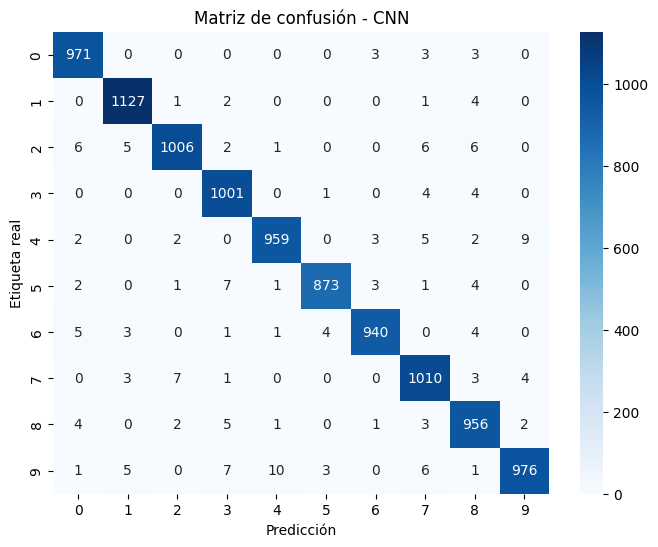

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Preparar datos: añadir canal
x_train_cnn = x_train_norm.reshape(-1,28,28,1)
x_test_cnn  = x_test_norm.reshape(-1,28,28,1)

model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(x_train_cnn, y_train_oh, epochs=10, batch_size=128, validation_split=0.1, verbose=2)

# Evaluación
loss_cnn, acc_cnn = model_cnn.evaluate(x_test_cnn, y_test_oh, verbose=0)
print(f"CNN - Test loss: {loss_cnn:.4f}, Test acc: {acc_cnn:.4f}")

# Matriz de confusión
y_pred_proba = model_cnn.predict(x_test_cnn)
y_pred = y_pred_proba.argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.title('Matriz de confusión - CNN')
plt.show()


Ejercicio 7:

Agrega Dropout(0.5) y BatchNormalization() en tu CNN.

Compara los resultados antes y después.

Objetivo: Aplicar técnicas para reducir overfitting.

In [11]:
from tensorflow.keras.layers import Dropout, BatchNormalization

model_cnn_bn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_cnn_bn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn_bn = model_cnn_bn.fit(x_train_cnn, y_train_oh, epochs=10, batch_size=128, validation_split=0.1, verbose=2)

loss_cnn_bn, acc_cnn_bn = model_cnn_bn.evaluate(x_test_cnn, y_test_oh, verbose=0)
print(f"CNN+BN+Dropout - Test loss: {loss_cnn_bn:.4f}, Test acc: {acc_cnn_bn:.4f}")


Epoch 1/10
422/422 - 80s - 189ms/step - accuracy: 0.9379 - loss: 0.2054 - val_accuracy: 0.1667 - val_loss: 2.4208
Epoch 2/10
422/422 - 77s - 183ms/step - accuracy: 0.9769 - loss: 0.0756 - val_accuracy: 0.9823 - val_loss: 0.0656
Epoch 3/10
422/422 - 76s - 180ms/step - accuracy: 0.9831 - loss: 0.0573 - val_accuracy: 0.9777 - val_loss: 0.0802
Epoch 4/10
422/422 - 71s - 169ms/step - accuracy: 0.9852 - loss: 0.0475 - val_accuracy: 0.9047 - val_loss: 0.3010
Epoch 5/10
422/422 - 65s - 154ms/step - accuracy: 0.9871 - loss: 0.0401 - val_accuracy: 0.9747 - val_loss: 0.0989
Epoch 6/10
422/422 - 70s - 166ms/step - accuracy: 0.9888 - loss: 0.0347 - val_accuracy: 0.9378 - val_loss: 0.2237
Epoch 7/10
422/422 - 64s - 153ms/step - accuracy: 0.9898 - loss: 0.0309 - val_accuracy: 0.8623 - val_loss: 0.4654
Epoch 8/10
422/422 - 93s - 220ms/step - accuracy: 0.9915 - loss: 0.0268 - val_accuracy: 0.6025 - val_loss: 4.1684
Epoch 9/10
422/422 - 82s - 194ms/step - accuracy: 0.9915 - loss: 0.0273 - val_accuracy: 

Ejercicio 8:

Usa ImageDataGenerator para realizar data augmentation (rotación,
desplazamiento, zoom).

Entrena la CNN y observa si mejora la precisión.

Objetivo: Incrementar la capacidad generalizadora del modelo

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

datagen.fit(x_train_cnn)
batch_size = 128
steps_per_epoch = x_train_cnn.shape[0] // batch_size

model_aug = model_cnn_bn
history_aug = model_aug.fit(datagen.flow(x_train_cnn, y_train_oh, batch_size=batch_size),
                            steps_per_epoch=steps_per_epoch,
                            epochs=10,
                            validation_data=(x_test_cnn, y_test_oh),
                            verbose=2)

# Evaluar
loss_aug, acc_aug = model_aug.evaluate(x_test_cnn, y_test_oh, verbose=0)
print("CNN con data augmentation - Test acc:", acc_aug)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
468/468 - 108s - 230ms/step - accuracy: 0.9516 - loss: 0.1614 - val_accuracy: 0.1950 - val_loss: 17.5262
Epoch 2/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 - 4s - 8ms/step - accuracy: 0.9766 - loss: 0.0941 - val_accuracy: 0.1622 - val_loss: 19.3583
Epoch 3/10
468/468 - 126s - 270ms/step - accuracy: 0.9674 - loss: 0.1065 - val_accuracy: 0.1012 - val_loss: 25.5012
Epoch 4/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 - 5s - 11ms/step - accuracy: 0.9688 - loss: 0.0912 - val_accuracy: 0.1031 - val_loss: 24.4324
Epoch 5/10
468/468 - 119s - 255ms/step - accuracy: 0.9738 - loss: 0.0887 - val_accuracy: 0.1474 - val_loss: 11.7236
Epoch 6/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 - 5s - 11ms/step - accuracy: 0.9766 - loss: 0.0822 - val_accuracy: 0.1906 - val_loss: 10.3576
Epoch 7/10
468/468 - 110s - 236ms/step - accuracy: 0.9749 - loss: 0.0821 - val_accuracy: 0.1657 - val_loss: 28.1303
Epoch 8/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


468/468 - 11s - 23ms/step - accuracy: 0.9922 - loss: 0.0577 - val_accuracy: 0.1680 - val_loss: 27.7209
Epoch 9/10
468/468 - 114s - 244ms/step - accuracy: 0.9772 - loss: 0.0762 - val_accuracy: 0.2901 - val_loss: 20.0284
Epoch 10/10
468/468 - 10s - 22ms/step - accuracy: 0.9609 - loss: 0.0918 - val_accuracy: 0.2931 - val_loss: 19.3098
CNN con data augmentation - Test acc: 0.2930999994277954


Ejercicio 9:

Genera un informe de clasificación (classification report) y matriz de
confusión.

Identifica los dígitos con más errores y explica brevemente por qué podría ocurrir.

Objetivo: Evaluar el modelo de forma más profunda

In [ ]:
from sklearn.metrics import classification_report

# Usar el mejor modelo obtenido (por ejemplo model_aug)
y_pred = model_aug.predict(x_test_cnn).argmax(axis=1)

print("Classification report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Ejercicio 10:

Guarda el modelo entrenado en formato .h5.
Cárgalo nuevamente y prueba su desempeño en un conjunto de imágenes
nuevas.

Objetivo: Aprender a guardar y reutilizar modelos en producción

Para la entrega:

• Un archivo examen_MNIST.ipynb con:

o Código ejecutable y bien comentado

o Gráficos y resultados

o Conclusión final: ¿qué modelo funcionó mejor y por qué?

In [ ]:
model_aug.save('modelo_mnist.h5')
print("Modelo guardado como modelo_mnist.h5")

# Cargar
from tensorflow.keras.models import load_model
modelo_cargado = load_model('modelo_mnist.h5')
# Probar carga con algunos ejemplos
sample = x_test_cnn[:5]
preds = modelo_cargado.predict(sample).argmax(axis=1)
print("Predicciones de ejemplo:", preds)
print("Etiquetas reales:", y_test[:5])


Ejercicio 11:

Objetivo: Crear una API para servir el modelo MNIST.
Tareas:
1. Instalar Flask (!pip install flask si usas Colab local o entorno externo).
2. Cargar el modelo guardado (modelo_mnist.h5).
3. Definir una ruta /predict que reciba una imagen en formato base64 o archivo
.png.
4. Preprocesar la imagen a formato 28x28 y devolver la predicción en JSON.

Ejemplo de código base:

from flask import Flask, request, jsonify

from tensorflow.keras.models import load_model

import numpy as np

import cv2

import io

from PIL import Image

app = Flask(__name__)

model = load_model("modelo_mnist.h5")

@app.route('/predict', methods=['POST'])

def predict():

 file = request.files['file']

 image = Image.open(file).convert('L')

 image = image.resize((28, 28))

 image = np.array(image).astype('float32') / 255.0

 image = image.reshape(1, 28, 28, 1)

 prediction = np.argmax(model.predict(image))

 return jsonify({'prediccion': int(prediction)})

if __name__ == '__main__':

 app.run(debug=True)

Nota: Para probar la API, puedes usar curl, Postman o un formulario HTML simple
que suba imágenes.

In [18]:
!pip install flask

In [19]:



















from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import io
from PIL import Image

app = Flask(__name__)
model = load_model("modelo_mnist.h5")

@app.route('/predict', methods=['POST'])
def predict():
    file = request.files['file']
    image = Image.open(file).convert('L')
    image = image.resize((28, 28))
    image = np.array(image).astype('float32') / 255.0
    image = image.reshape(1, 28, 28, 1)
    prediction = np.argmax(model.predict(image))

    return jsonify({'prediccion': int(prediction)})

if __name__ == '__main__':

    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)
ERROR:root:Unexpected exception finding object shape
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/google/colab/_debugpy_repr.py", line 54, in get_shape
    shape = getattr(obj, 'shape', None)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 318, in __get__
    obj = instance._get_current_object()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/werkzeug/local.py", line 519, in _get_current_object
    raise RuntimeError(unbound_message) from None
RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Cons